In [1]:
import pandas as pd
import numpy as np
import folium
import branca
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

%matplotlib inline

In [2]:
mpl.style.use(['ggplot']) 

In [3]:
# Combine venue details into one file
venue_italian = pd.read_csv('Venue Details_1.csv', header=0)
venue_american = pd.read_csv('Venue Details_2.csv', header=0)
venue_sand = pd.read_csv('Venue Details_3.csv', header=0)
venue_japan = pd.read_csv('Venue Details_4.csv', header=0)

In [4]:
df = pd.concat([venue_italian, venue_american, venue_sand, venue_japan], ignore_index=True)

In [5]:
# Merge the location information of neighbourhoods
man = pd.read_csv('Manhattan Neighbourhood.csv', header=0)

In [6]:
df = pd.merge(df, man, on='Neighbourhood')

In [7]:
# Correct the column names
df.columns = list(df.columns[:2]) + ['Venue Latitude', 'Venue Longitude'] + list(df.columns[4:])

In [8]:
df.head()

,Neighbourhood,Name,Venue Latitude,Venue Longitude,Address,Category,ID,Verified,Category 1,Category 2,...,Rating,createdAt,Price Tier,Price Description,Tips,Open Date,Days since Open,Borough,Latitude,Longitude
0,Marble Hill,Arturo's,40.874412,-73.910271,"['5198 Broadway (at 225th St.)', 'New York, NY...",Pizza,4b4429abf964a52037f225e3,False,Pizza,Italian,...,8.4,1262758315,1,Cheap,16,2010-01-06,3281,Manhattan,40.876551,-73.91066
1,Marble Hill,Boston Market,40.877430,-73.905412,"['5520 Broadway', 'Bronx, NY 10463', 'United S...",American,585c205665e7c70a2f1055ea,False,American,Comfort Food,...,7.0,1482432598,2,Moderate,1,2016-12-23,738,Manhattan,40.876551,-73.91066
2,Marble Hill,Terrace View Delicatessen,40.876476,-73.912746,"['135 Terrace View Ave.', 'New York, NY 10034'...",Deli / Bodega,4ed7956b8b81b2bf28adc714,False,Deli / Bodega,Smoke Shop,...,NaN,1322751339,1,Cheap,0,2011-12-01,2587,Manhattan,40.876551,-73.91066
3,Marble Hill,Kennedy Deli,40.880121,-73.907050,"['302 W 231st St', 'Bronx, NY 10463', 'United ...",Deli / Bodega,4cdd78146ad1a09302a3f756,False,Deli / Bodega,NaN,...,NaN,1289582612,1,Cheap,0,2010-11-13,2970,Manhattan,40.876551,-73.91066
4,Marble Hill,Subway Sandwiches,40.874667,-73.909586,"['5209 Broadway', 'Bronx, NY 10463', 'United S...",Sandwiches,4b4f7b65f964a5205a0827e3,False,Sandwiches,Fast Food,...,6.5,1263500133,1,Cheap,1,2010-01-15,3272,Manhattan,40.876551,-73.91066


In [9]:
df.shape

(1385, 22)

Text(0,0.5,'')

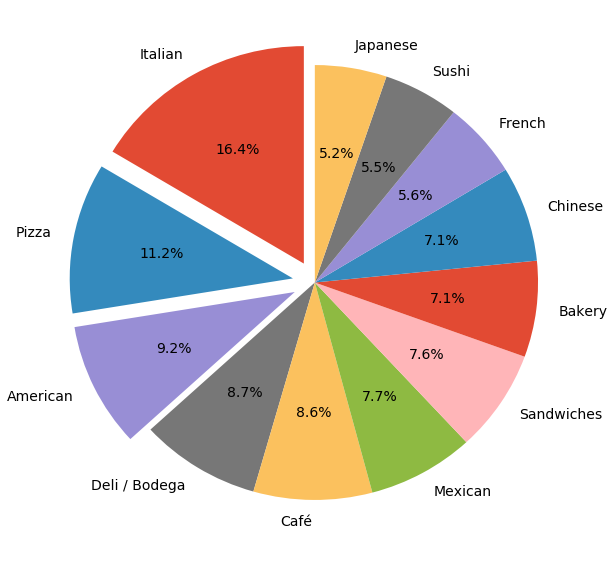

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

# color = ['red', 'orange', 'coral', 'navajowhite', 'tomato', 'yellow', 'violet']
explode = [0.1, 0.1, 0.1] + list(np.zeros(9))

df.Category.value_counts().plot(kind='pie', 
                                ax=ax,
                                explode=explode,
                                autopct='%1.1f%%',
                                startangle=90,
                                fontsize=14)
ax.set_ylabel('')

# ax.legend(df.Category.value_counts().index, loc='upper left')

In [11]:
list(np.ones(9)) + [1.2]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.2]

In [12]:
df.describe()

,Venue Latitude,Venue Longitude,Rating,createdAt,Price Tier,Tips,Days since Open,Latitude,Longitude
count,1385.000000,1385.000000,1283.000000,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,40.757142,-73.978175,8.012003,1.321728e+09,1.836823,60.020217,2598.233213,40.757193,-73.978140
std,0.038143,0.023230,0.862838,1.205244e+08,0.873966,101.705988,1394.960443,0.038189,0.023202
min,40.703309,-74.018322,4.900000,1.071014e+09,1.000000,0.000000,-55.000000,40.707107,-74.016869
25%,40.726224,-73.997991,7.500000,1.252618e+09,1.000000,6.000000,1472.000000,40.726933,-73.997305
50%,40.750075,-73.982462,8.100000,1.292087e+09,2.000000,23.000000,2941.000000,40.748510,-73.981669
75%,40.775450,-73.959352,8.700000,1.419019e+09,2.000000,70.000000,3398.000000,40.775639,-73.960508
max,40.880121,-73.905380,9.500000,1.550964e+09,4.000000,1349.000000,5500.000000,40.876551,-73.910660


In [13]:
df[['Rating', 'Tips', 'Days since Open', 'Price Tier']].corr()

,Rating,Tips,Days since Open,Price Tier
Rating,1.000000,0.465219,0.000883,0.293448
Tips,0.465219,1.000000,0.372426,0.254084
Days since Open,0.000883,0.372426,1.000000,0.206203
Price Tier,0.293448,0.254084,0.206203,1.000000


Text(0,0.5,'Tips')

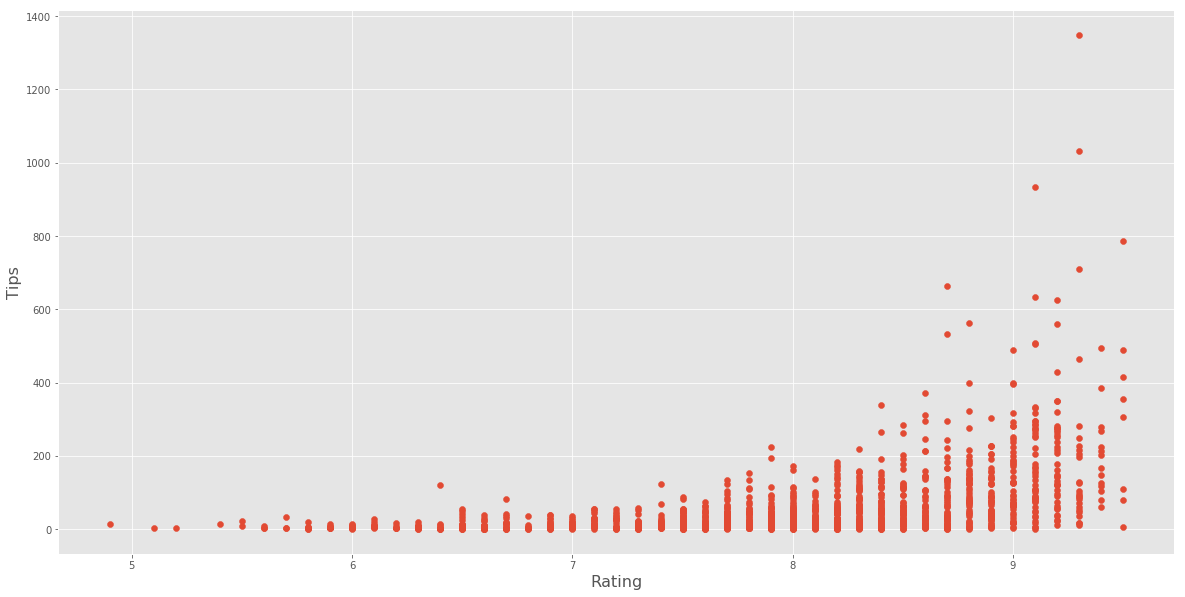

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x='Rating', y='Tips', data=df[['Rating', 'Tips']])
ax.set_xlabel('Rating', fontsize=16)
# ax.set_xticklabels(labels=[5, 6, 7, 8, 9, 10], fontsize=16)
ax.set_ylabel('Tips', fontsize=16)
# ax.set_yticklabels(labels=np.arange(0, 1400, 200), fontsize=1)

# df[['Rating', 'Tips']].plot(x='Rating', y='Tips', kind='scatter', figsize=(20, 10))


In [15]:
# Create plots on opening dates
categories = df['Category 1'].value_counts().index

In [16]:
df_time = pd.DataFrame({'Temp': range(64)}, index=pd.date_range('2003Q1', '2019Q1', freq='Q'))
df_time = df_time.to_period('Q-DEC')
df_time.head()

for cuisine in categories:
    df_cuisine = df[df['Category 1'] == cuisine]['createdAt'].value_counts().reset_index()
    df_cuisine['Open Quarter'] = [datetime.datetime.fromtimestamp(x) for x in df_cuisine['index']]
#     Sum the cummulative values over the time
    df_cuisine = df_cuisine.groupby('Open Quarter')[['createdAt']].sum().cumsum()
#     Convert the timestamp to quarter, and remove the duplicates
    df_cuisine = df_cuisine.to_period('Q-DEC')
    df_cuisine = df_cuisine.groupby(df_cuisine.index).last()
    df_cuisine.columns = [cuisine]
#     Join the table using Index
    df_time = df_time.join(df_cuisine)

df_time.drop(['Temp'], axis=1, inplace=True)

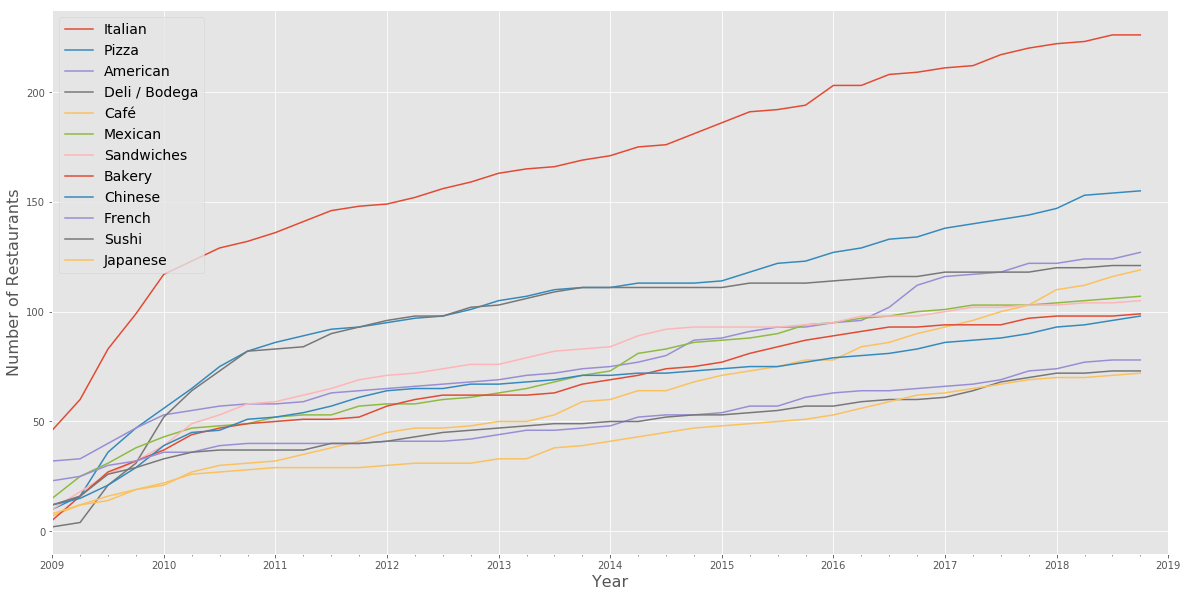

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
df_time.fillna(method='ffill').plot(ax=ax)

ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Restaurants', fontsize=16)
ax.set_xlim('2009', '2019')
ax.legend(fontsize=14)

In [18]:
# Break here

In [20]:
# Box plots for ratings

df_rating = df[df['Category 1']=='Italian'][['Rating']]
df_rating.columns = ['Italian']

for cuisine in categories[1:]:
    df_rate = df[df['Category 1']==cuisine][['Rating']]
    df_rate.columns = [cuisine]
    df_rating = pd.concat([df_rating, df_rate], axis=1)

In [21]:
df_rating.describe()

,Italian,Pizza,American,Deli / Bodega,Café,Mexican,Sandwiches,Bakery,Chinese,French,Sushi,Japanese
count,223.000000,137.000000,126.000000,80.000000,110.000000,101.000000,103.000000,92.000000,87.000000,78.000000,75.000000,71.000000
mean,8.270852,7.770803,8.197619,7.278750,7.965455,7.941584,7.760194,8.147826,7.852874,8.317949,8.048000,8.343662
std,0.671829,0.952949,0.781124,0.897774,0.861558,0.751700,0.958588,0.756725,1.036411,0.635271,0.799385,0.757389
min,6.100000,4.900000,5.500000,5.500000,5.100000,5.600000,5.700000,5.900000,5.200000,5.800000,5.900000,6.100000
25%,7.900000,7.100000,7.700000,6.600000,7.500000,7.600000,6.900000,7.700000,7.250000,8.000000,7.600000,7.800000
50%,8.300000,7.900000,8.300000,7.300000,8.050000,8.000000,7.900000,8.250000,7.900000,8.400000,8.200000,8.500000
75%,8.800000,8.500000,8.875000,7.800000,8.500000,8.500000,8.400000,8.700000,8.750000,8.800000,8.450000,8.950000
max,9.500000,9.300000,9.500000,9.400000,9.400000,9.300000,9.400000,9.500000,9.300000,9.500000,9.500000,9.500000


Text(0,0.5,'Rating')

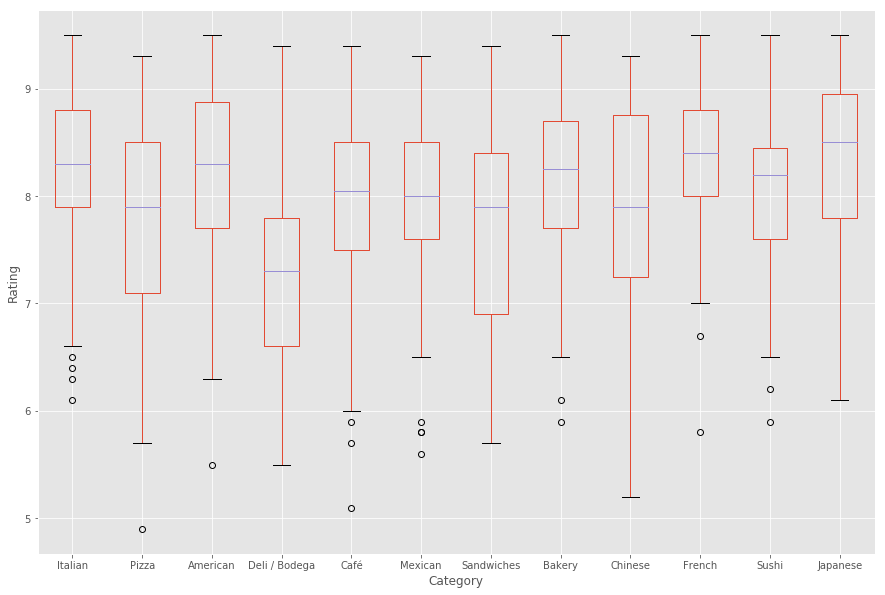

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
df_rating.plot(kind='box', ax=ax)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)

In [23]:
# Box plots for price tier

df_tier = df[df['Category 1']=='Italian'][['Price Tier']]
df_tier.columns = ['Italian']

for cuisine in categories[1:]:
    df_price = df[df['Category 1']==cuisine][['Price Tier']]
    df_price.columns = [cuisine]
    df_tier = pd.concat([df_tier, df_price], axis=1)

In [24]:
df_tier.describe()

,Italian,Pizza,American,Deli / Bodega,Café,Mexican,Sandwiches,Bakery,Chinese,French,Sushi,Japanese
count,227.000000,155.000000,128.000000,121.000000,119.000000,107.000000,105.000000,99.000000,98.000000,78.000000,76.000000,72.000000
mean,2.621145,1.200000,2.390625,1.165289,1.336134,1.738318,1.352381,1.343434,1.428571,2.717949,2.210526,2.444444
std,0.785427,0.417164,0.701342,0.453635,0.508859,0.828006,0.518521,0.518271,0.703452,0.622050,0.595892,0.853970
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000
75%,3.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000
max,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000


Text(0,0.5,'Price Tier')

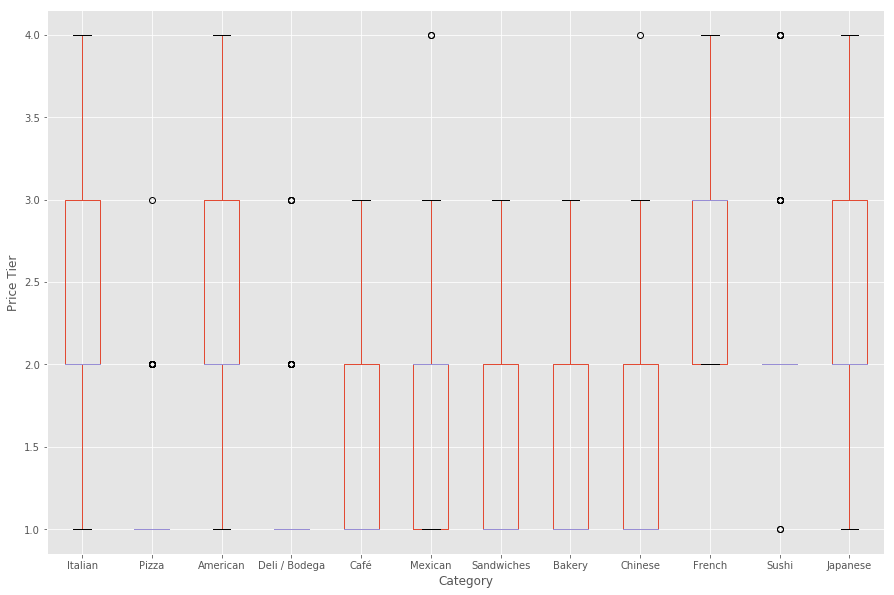

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
df_tier.plot(kind='box', ax=ax)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Price Tier', fontsize=12)

In [26]:
# Box plots for days

df_days = df[df['Category 1']=='Italian'][['Days since Open']]
df_days.columns = ['Italian']

for cuisine in categories[1:]:
    df_open = df[df['Category 1']==cuisine][['Days since Open']]
    df_open.columns = [cuisine]
    df_days = pd.concat([df_days, df_open], axis=1)

Text(0,0.5,'Days since Open')

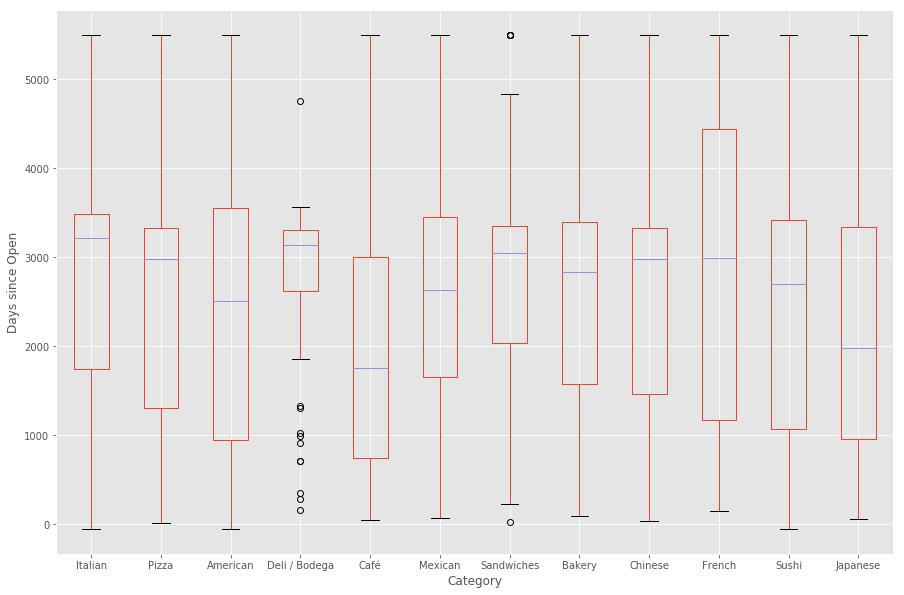

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
df_days.plot(kind='box', ax=ax)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Days since Open', fontsize=12)

In [28]:
# Feature Selection
pd.get_dummies(df['Category 1'])[:5]

,American,Bakery,Café,Chinese,Deli / Bodega,French,Italian,Japanese,Mexican,Pizza,Sandwiches,Sushi
0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
new_df = df.join(pd.get_dummies(df['Category 1']))

In [30]:
new_df_grouped = new_df.groupby('Neighbourhood').mean()

In [31]:
new_df.columns

Index(['Neighbourhood', 'Name', 'Venue Latitude', 'Venue Longitude', 'Address',
       'Category', 'ID', 'Verified', 'Category 1', 'Category 2', 'Stats',
       'Price', 'Rating', 'createdAt', 'Price Tier', 'Price Description',
       'Tips', 'Open Date', 'Days since Open', 'Borough', 'Latitude',
       'Longitude', 'American', 'Bakery', 'Café', 'Chinese', 'Deli / Bodega',
       'French', 'Italian', 'Japanese', 'Mexican', 'Pizza', 'Sandwiches',
       'Sushi'],
      dtype='object')

In [32]:
features = new_df_grouped[['Rating', 'Price Tier', 'Days since Open', \
                           'American', 'Bakery', 'Café', 'Chinese', 'Deli / Bodega',\
                           'French', 'Italian', 'Japanese', 'Mexican', 'Pizza', 'Sandwiches', 'Sushi']]

In [33]:
features.dropna(axis=0, inplace=True)

c:\users\geo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
# Top 3 most common venue in each neighbourhood
list_sort = []

for i in range(40):
    
    line = features.iloc[i, 3:]
    top3 = line.sort_values(ascending=False)[:3].index
    for each_top in top3:
        list_sort.append(each_top)

In [35]:
df_top = pd.DataFrame({'1st Most Common Venue': list_sort[::3],
                       '2nd Most Common Venue': list_sort[1::3],
                       '3rd Most Common Venue': list_sort[2::3]})

In [36]:
df_top = pd.concat([features.reset_index().iloc[:, :3], df_top], axis=1)

df_top

,Neighbourhood,Rating,Price Tier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Battery Park City,7.656250,1.437500,Pizza,Italian,Sandwiches
1,Carnegie Hill,7.691667,1.783784,Pizza,Bakery,Café
2,Central Harlem,7.633333,1.250000,Pizza,Deli / Bodega,Chinese
3,Chelsea,8.308333,2.145833,Italian,Bakery,Café
4,Chinatown,8.484783,1.434783,Chinese,Bakery,Sandwiches
5,Civic Center,7.982500,2.000000,Italian,Sandwiches,Bakery
6,Clinton,7.734884,1.851064,Italian,American,Sandwiches
7,East Harlem,7.600000,1.142857,Mexican,Pizza,Deli / Bodega
8,East Village,8.569231,1.948718,Pizza,Mexican,Italian
9,Financial District,8.144186,1.837209,Sandwiches,American,Café


In [37]:
# Normalize feature sets
from sklearn.preprocessing import StandardScaler

In [38]:
X = StandardScaler().fit_transform(features)

In [39]:
features.dtypes

Rating             float64
Price Tier         float64
Days since Open    float64
American           float64
Bakery             float64
Café               float64
Chinese            float64
Deli / Bodega      float64
French             float64
Italian            float64
Japanese           float64
Mexican            float64
Pizza              float64
Sandwiches         float64
Sushi              float64
dtype: object

In [40]:
# Select the optimal number of clusters
from sklearn.cluster import KMeans

In [41]:
df_features = []
for x in X:
    df_features.append(x)

In [42]:
list_distance = []

for k_cluster in range(3, 15):
    kM_0 = KMeans(n_clusters=k_cluster, init='k-means++', random_state=0)
    kM_0.fit(X)
    
    df_X_feature = pd.DataFrame({'Neigh': df_features, 'Label': kM_0.labels_})
    total_distance = 0
    
    for i in range(k_cluster):
        centroid = kM_0.cluster_centers_[i]
        groups = df_X_feature[df_X_feature.Label == i]['Neigh']
        group_distance = 0
        
        for point in groups:
            distance = np.sqrt(np.square(point-centroid).sum())
            group_distance += distance
        
        total_distance += group_distance
    
    list_distance.append(total_distance/k_cluster)

In [43]:
kM_df = pd.DataFrame({'Cluster': np.arange(3, 15), 'Mean Distance': list_distance})

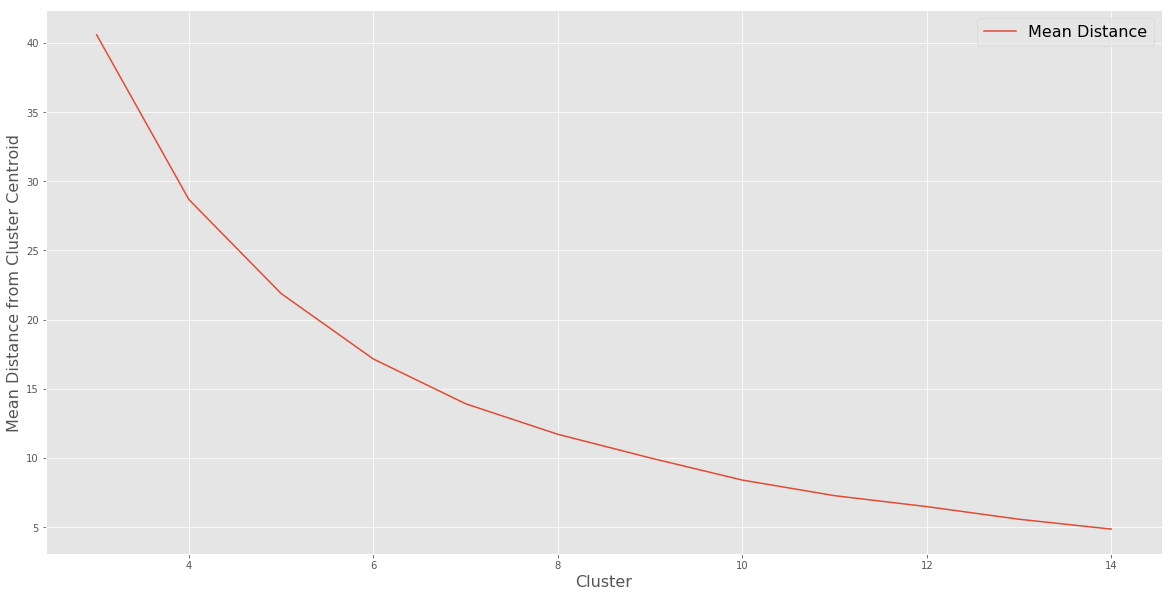

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
kM_df.plot(x='Cluster', y='Mean Distance', ax=ax)
ax.set_xlabel('Cluster', fontsize=16)
ax.set_ylabel('Mean Distance from Cluster Centroid', fontsize=16)
ax.legend(fontsize=16)


In [45]:
# k-Means Clustering
no_cluster = 6
kM = KMeans(n_clusters=no_cluster, init='k-means++', random_state=3)
kM.fit(X)
labels = kM.labels_

In [46]:
new_df_grouped['label'] = labels

In [47]:
new_df_grouped.groupby('label').mean()

,Venue Latitude,Venue Longitude,Verified,Rating,createdAt,Price Tier,Tips,Days since Open,Latitude,Longitude,...,Café,Chinese,Deli / Bodega,French,Italian,Japanese,Mexican,Pizza,Sandwiches,Sushi
label,,,,,,,,,,,,,,,,,,,,,
0,40.727230,-73.999136,0.444679,8.309972,1.388975e+09,1.903453,56.198379,1819.858351,40.727808,-73.999689,...,0.130374,0.015152,0.046512,0.026779,0.133897,0.110641,0.046512,0.065187,0.138478,0.015152
1,40.741363,-73.993261,0.522097,8.243806,1.298531e+09,2.168316,94.099308,2866.737640,40.741371,-73.994183,...,0.098667,0.052205,0.047287,0.090610,0.275608,0.043983,0.055417,0.062911,0.051924,0.033506
2,40.797479,-73.953061,0.104937,6.951804,1.311294e+09,1.372056,12.443931,2719.033514,40.797643,-73.952410,...,0.071966,0.118161,0.279257,0.012500,0.026268,0.018750,0.050226,0.107156,0.206703,0.029167
3,40.755524,-74.000000,0.333333,7.950000,1.391751e+09,1.333333,27.333333,1787.666667,40.756658,-74.000111,...,0.500000,0.166667,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
4,40.775803,-73.965613,0.292974,7.601839,1.337366e+09,1.296540,36.914835,2417.254624,40.776199,-73.965722,...,0.068852,0.157360,0.108181,0.012897,0.050151,0.017512,0.124162,0.177790,0.080030,0.014583
5,40.755460,-73.975872,0.423388,8.031727,1.327972e+09,1.880310,53.156863,2525.958628,40.755328,-73.975172,...,0.077734,0.040024,0.071050,0.072406,0.157697,0.064862,0.082639,0.138423,0.060066,0.081990


In [48]:
new_df_grouped.groupby('label').mean().columns

Index(['Venue Latitude', 'Venue Longitude', 'Verified', 'Rating', 'createdAt',
       'Price Tier', 'Tips', 'Days since Open', 'Latitude', 'Longitude',
       'American', 'Bakery', 'Café', 'Chinese', 'Deli / Bodega', 'French',
       'Italian', 'Japanese', 'Mexican', 'Pizza', 'Sandwiches', 'Sushi'],
      dtype='object')

In [49]:
list_sort = []
grouped = new_df_grouped.groupby('label').mean()

for i in range(6):
    line = grouped.iloc[i, 10:]
    top3 = line.sort_values(ascending=False)[:3].index
    for each_top in top3:
        list_sort.append(each_top)

In [50]:
cluster_top3 = pd.DataFrame({'1st Most Common Venue': list_sort[::3],
                             '2nd Most Common Venue': list_sort[1::3],
                             '3rd Most Common Venue': list_sort[2::3]})

cluster_top3 = pd.concat([grouped.iloc[:, 3:8], cluster_top3], axis=1)

In [51]:
cluster_top3

,Rating,createdAt,Price Tier,Tips,Days since Open,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
label,,,,,,,,
0,8.309972,1.388975e+09,1.903453,56.198379,1819.858351,American,Sandwiches,Italian
1,8.243806,1.298531e+09,2.168316,94.099308,2866.737640,Italian,American,Café
2,6.951804,1.311294e+09,1.372056,12.443931,2719.033514,Deli / Bodega,Sandwiches,Chinese
3,7.950000,1.391751e+09,1.333333,27.333333,1787.666667,Café,Italian,Chinese
4,7.601839,1.337366e+09,1.296540,36.914835,2417.254624,Pizza,Chinese,Bakery
5,8.031727,1.327972e+09,1.880310,53.156863,2525.958628,Italian,Pizza,Mexican


In [68]:
new_df_grouped.reset_index().to_csv('k-Means Cluster.csv', index=False)

In [52]:
import branca

In [53]:
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, no_cluster-1)

man_map = folium.Map(location=[40.77, -73.96], zoom_start=12)

for ngh, lat, lon, label in zip(new_df_grouped.index, new_df_grouped.Latitude, new_df_grouped.Longitude, new_df_grouped.label):
    text = folium.Popup(str(ngh)+' - '+str(label))
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup = text,
                        color=colorscale(label),
                        fill=True,
                        fill_color=colorscale(label),
                        fill_opacity=1).add_to(man_map)
man_map

In [54]:
colorscale

In [55]:
# Try Hierachical Clustering
from sklearn.cluster import AgglomerativeClustering

In [56]:
agglom = AgglomerativeClustering(n_clusters=no_cluster, linkage='average')
agglom.fit(X)
agglom.labels_

array([0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 0, 5, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 4, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2], dtype=int64)

In [57]:
agg_df = new_df_grouped
agg_df['label'] = agglom.labels_

In [58]:
agg_df.groupby('label').mean()

,Venue Latitude,Venue Longitude,Verified,Rating,createdAt,Price Tier,Tips,Days since Open,Latitude,Longitude,...,Café,Chinese,Deli / Bodega,French,Italian,Japanese,Mexican,Pizza,Sandwiches,Sushi
label,,,,,,,,,,,,,,,,,,,,,
0,40.798915,-73.953766,0.185648,7.178390,1.328030e+09,1.276742,16.603009,2525.332626,40.799310,-73.953773,...,0.076968,0.119411,0.198595,0.014782,0.040776,0.019444,0.088319,0.156709,0.128904,0.026736
1,40.731446,-73.977750,0.000000,6.600000,1.280226e+09,2.000000,7.000000,3078.500000,40.731000,-73.974052,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
2,40.748148,-73.983802,0.462143,8.115943,1.318204e+09,1.986516,68.078356,2639.024768,40.748085,-73.983780,...,0.088159,0.042924,0.063054,0.077185,0.200188,0.057237,0.072863,0.107245,0.062262,0.060392
3,40.716224,-73.995222,0.369565,8.484783,1.297958e+09,1.434783,114.804348,2873.304348,40.715618,-73.994279,...,0.065217,0.456522,0.000000,0.000000,0.021739,0.021739,0.086957,0.043478,0.086957,0.000000
4,40.747600,-73.988585,0.424242,8.475758,1.419449e+09,1.969697,69.606061,1467.181818,40.748510,-73.988713,...,0.121212,0.030303,0.000000,0.030303,0.151515,0.151515,0.000000,0.060606,0.090909,0.030303
5,40.755524,-74.000000,0.333333,7.950000,1.391751e+09,1.333333,27.333333,1787.666667,40.756658,-74.000111,...,0.500000,0.166667,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
list_sort = []
grouped = agg_df.groupby('label').mean()

for i in range(6):
    line = grouped.iloc[i, 10:]
    top3 = line.sort_values(ascending=False)[:3].index
    for each_top in top3:
        list_sort.append(each_top)

In [60]:
agg_top3 = pd.DataFrame({'1st Most Common Venue': list_sort[::3],
                         '2nd Most Common Venue': list_sort[1::3],
                         '3rd Most Common Venue': list_sort[2::3]})

agg_top3 = pd.concat([grouped.iloc[:, 3:8], agg_top3], axis=1)

In [61]:
agg_top3

,Rating,createdAt,Price Tier,Tips,Days since Open,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
label,,,,,,,,
0,7.178390,1.328030e+09,1.276742,16.603009,2525.332626,Deli / Bodega,Pizza,Sandwiches
1,6.600000,1.280226e+09,2.000000,7.000000,3078.500000,Sandwiches,Deli / Bodega,Sushi
2,8.115943,1.318204e+09,1.986516,68.078356,2639.024768,Italian,Pizza,American
3,8.484783,1.297958e+09,1.434783,114.804348,2873.304348,Chinese,Bakery,Sandwiches
4,8.475758,1.419449e+09,1.969697,69.606061,1467.181818,American,Japanese,Italian
5,7.950000,1.391751e+09,1.333333,27.333333,1787.666667,Café,Italian,Chinese


In [62]:
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, no_cluster-1)

man_map_2 = folium.Map(location=[40.77, -73.96], zoom_start=12)

for ngh, lat, lon, label in zip(agg_df.index, agg_df.Latitude, agg_df.Longitude, agg_df.label):
    text = folium.Popup(str(ngh)+' - '+str(label))
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup = text,
                        color=colorscale(label),
                        fill=True,
                        fill_color=colorscale(label),
                        fill_opacity=1).add_to(man_map_2)
man_map_2

In [63]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import scipy

In [64]:
leng = X.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(X[i], X[j])

In [65]:
Z = hierarchy.linkage(D)

c:\users\geo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


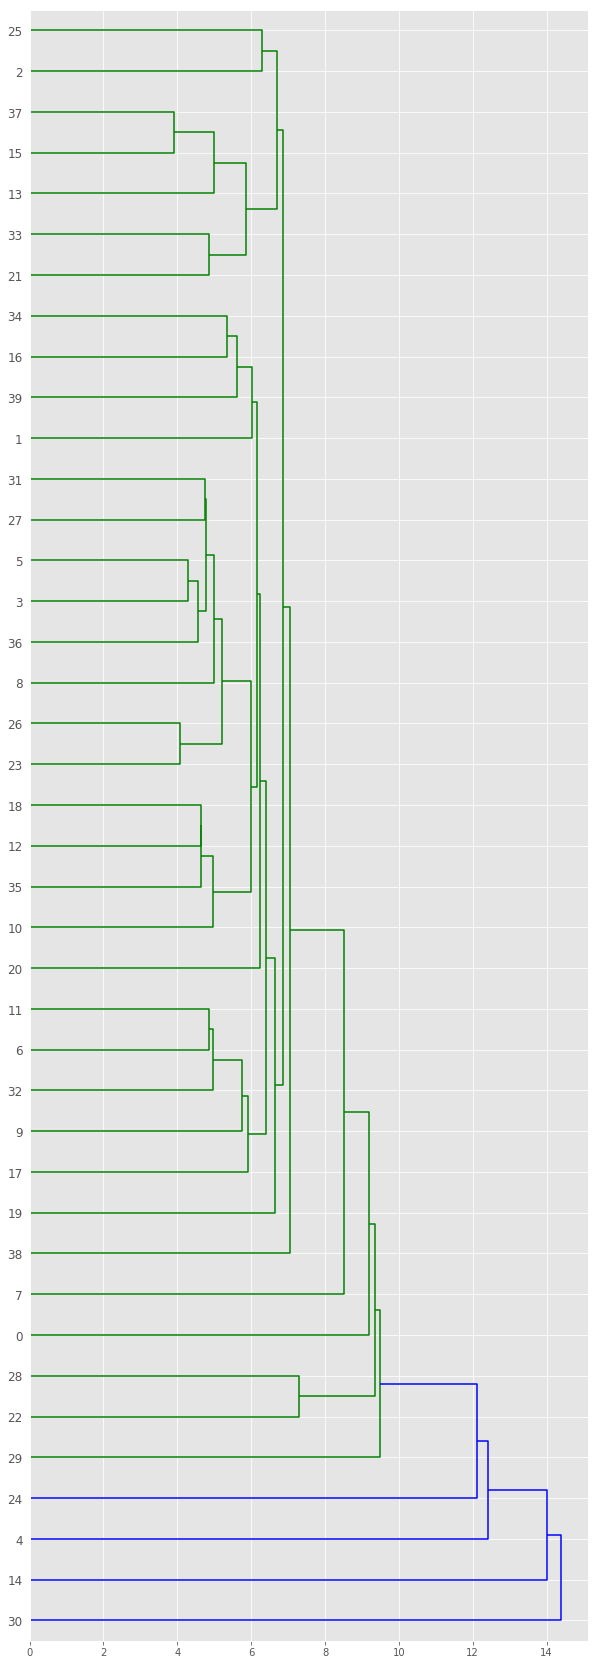

In [66]:
import pylab
fig = pylab.figure(figsize=[10, 30])
den = hierarchy.dendrogram(Z, leaf_font_size=12, orientation='right')